In [2]:
# Libraries, assemble
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
%autosave 180

Autosaving every 180 seconds


In [3]:
japan = pd.read_csv("japan_suicide.csv")

In [7]:
japan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            372 non-null    object 
 1   year               372 non-null    int64  
 2   sex                372 non-null    object 
 3   age                372 non-null    object 
 4   suicides_no        372 non-null    int64  
 5   population         372 non-null    int64  
 6   suicides/100k pop  372 non-null    float64
 7   country-year       372 non-null    object 
 8   HDI for year       120 non-null    float64
 9    gdp_for_year      372 non-null    object 
 10  gdp_per_capita     372 non-null    int64  
 11  generation         372 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 35.0+ KB


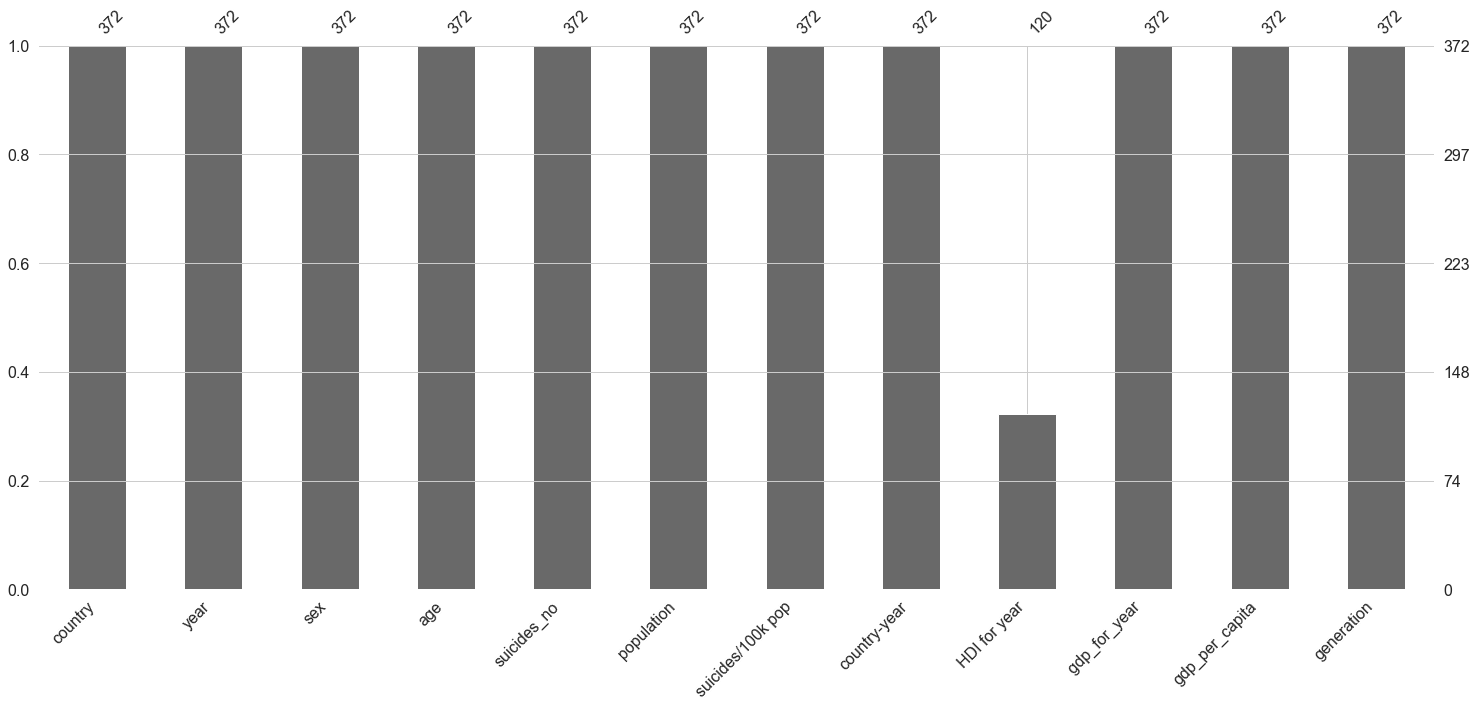

In [5]:
msno.bar(japan);

In [4]:
japan.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Japan,1985,male,75+ years,1340,1791000,74.82,Japan1985,0.791,"1,398,892,744,821",12401,G.I. Generation
1,Japan,1985,female,75+ years,1553,2862400,54.26,Japan1985,0.791,"1,398,892,744,821",12401,G.I. Generation
2,Japan,1985,male,55-74 years,3763,8996900,41.83,Japan1985,0.791,"1,398,892,744,821",12401,G.I. Generation
3,Japan,1985,male,35-54 years,6962,17833300,39.04,Japan1985,0.791,"1,398,892,744,821",12401,Silent
4,Japan,1985,male,25-34 years,1982,8465800,23.41,Japan1985,0.791,"1,398,892,744,821",12401,Boomers


In [5]:
# Time to get rid of unnecessary columns

In [6]:
# Completely useless
japan.drop(columns = ["country"], inplace=True)

In [7]:
# "Another one" - DJ Khaled
japan.drop(columns = ["country-year"], inplace=True)

In [8]:
# "I don't need it" - Spongebob Squarepants
japan.drop(columns = ["suicides/100k pop"], inplace=True)

In [9]:
# Pivot Tables in Python > Pivot Tables in Excel

In [10]:
# Generations with the highest deaths in descending order
generation = japan.pivot_table(index="generation", values="suicides_no", aggfunc="sum").sort_values("suicides_no", ascending=False)

In [11]:
# Deaths by Year
year = japan.pivot_table(index="year", values="suicides_no", aggfunc="sum")

In [12]:
# Time to visualize

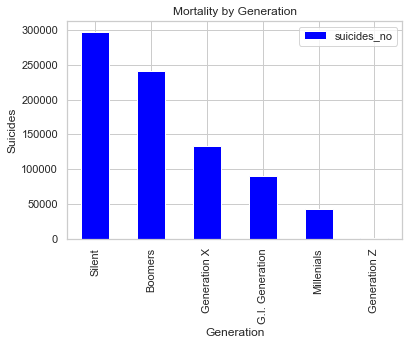

In [13]:
generation.plot(kind='bar', color='blue', xlabel='Generation', ylabel='Suicides', title="Mortality by Generation");

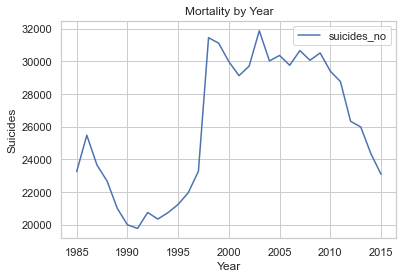

In [14]:
year.plot(kind='line', xlabel="Year", ylabel='Suicides', title='Mortality by Year');

In [15]:
# See Tableau Dashboard to view combined data for Generation Mortality by Year

In [16]:
# Let's check for correlated values in the set

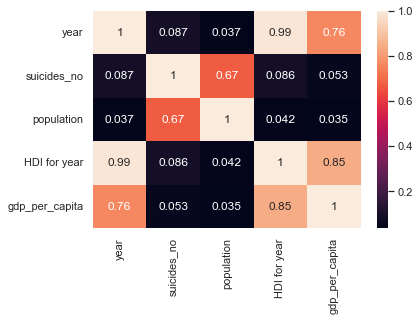

In [17]:
sns.heatmap(japan.corr(), annot=True);

In [18]:
# HDI and GDP highly correspond with the numbers of Suicide

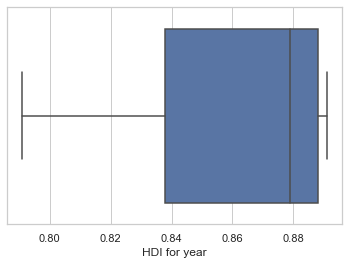

In [19]:
# Here's the HDI interpreted into Boxplot form
sns.boxplot(x="HDI for year", data=japan, hue="suicides_no");

In [20]:
# See Tableau Dashboard to view GDP for Boomer + Silent Generation by Year